In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib 

In [210]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_hfo2_del.pkl')
df = pd.read_pickle(path)
df

,structure,name
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif


In [211]:
from matminer.featurizers.structure import XRDPowderPattern
xrd = XRDPowderPattern(two_theta_range=(0, 50))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_41,xrd_42,xrd_43,xrd_44,xrd_45,xrd_46,xrd_47,xrd_48,xrd_49,xrd_50
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.312411e-02,4.787334e-02,0.000076,4.499734e-11,0.000598,1.853667e-02,3.095464e-03,1.405846e-09,2.357395e-05,4.081085e-03
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.013866e-314,...,5.789377e-04,6.507739e-05,0.006301,5.451000e-02,0.000354,4.862138e-09,1.794791e-03,1.288910e-02,1.601129e-04,1.312315e-02
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,1.859203e-198,6.902400e-157,2.645291e-120,1.046518e-88,4.273855e-62,1.801743e-40,7.840899e-24,3.522401e-12,...,2.655341e-02,1.781638e-05,0.133811,1.276039e-01,0.007491,1.749252e-08,5.563061e-19,1.977902e-34,7.552413e-55,3.049867e-80
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.609298e-21,5.096782e-09,0.018631,2.006434e-01,0.000458,1.092186e-03,2.777511e-09,7.347005e-21,2.021438e-38,5.785034e-62
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,6.536916e-217,6.311742e-170,9.005426e-129,1.898619e-93,5.914938e-64,2.722959e-40,1.852297e-22,1.861911e-10,...,1.137457e-02,4.908510e-02,0.000209,1.930341e-09,0.002388,1.000377e-02,5.495262e-03,8.254726e-09,1.463688e-05,1.990092e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.774493e-24,1.373882e-09,0.025764,9.031279e-02,0.000001,1.184646e-18,8.673929e-38,4.104001e-64,1.254755e-97,2.478964e-138
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.521553e-290,2.320862e-243,...,4.563548e-02,2.420462e-02,0.000141,1.402437e-04,0.026164,1.215131e-02,1.290101e-05,1.143977e-03,7.922678e-03,3.731550e-02
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,2.285876e-178,7.190593e-141,6.770837e-108,1.908471e-79,1.610254e-55,4.066952e-36,3.074745e-21,6.958487e-11,...,1.415787e-03,3.264953e-04,0.031312,3.428345e-02,0.000282,2.122214e-03,7.259772e-03,9.069266e-03,2.241352e-03,2.930635e-02
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.924122e-294,9.406642e-245,...,7.740538e-03,4.153924e-03,0.141271,7.793972e-02,0.007148,2.525240e-03,1.111916e-02,1.491476e-02,4.332572e-03,2.278212e-07


In [212]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values

In [213]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_41,xrd_42,xrd_43,xrd_44,xrd_45,xrd_46,xrd_47,xrd_48,xrd_49,xrd_50
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.398451e-285,1.066344e-230,...,1.312411e-02,4.787334e-02,0.000076,4.499734e-11,0.000598,1.853667e-02,3.095464e-03,1.405846e-09,2.357395e-05,4.081085e-03
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.013866e-314,1.086237e-258,1.408128e-208,...,5.789377e-04,6.507739e-05,0.006301,5.451000e-02,0.000354,4.862138e-09,1.794791e-03,1.288910e-02,1.601129e-04,1.312315e-02
2,1.859203e-198,6.902400e-157,2.645291e-120,1.046518e-88,4.273855e-62,1.801743e-40,7.840899e-24,3.522401e-12,1.633472e-05,7.819601e-04,...,2.655341e-02,1.781638e-05,0.133811,1.276039e-01,0.007491,1.749252e-08,5.563061e-19,1.977902e-34,7.552413e-55,3.049867e-80
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.609298e-21,5.096782e-09,0.018631,2.006434e-01,0.000458,1.092186e-03,2.777511e-09,7.347005e-21,2.021438e-38,5.785034e-62
4,6.536916e-217,6.311742e-170,9.005426e-129,1.898619e-93,5.914938e-64,2.722959e-40,1.852297e-22,1.861911e-10,2.765577e-04,6.070037e-04,...,1.137457e-02,4.908510e-02,0.000209,1.930341e-09,0.002388,1.000377e-02,5.495262e-03,8.254726e-09,1.463688e-05,1.990092e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.774493e-24,1.373882e-09,0.025764,9.031279e-02,0.000001,1.184646e-18,8.673929e-38,4.104001e-64,1.254755e-97,2.478964e-138
1721,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.521553e-290,2.320862e-243,2.148695e-200,1.207434e-161,...,4.563548e-02,2.420462e-02,0.000141,1.402437e-04,0.026164,1.215131e-02,1.290101e-05,1.143977e-03,7.922678e-03,3.731550e-02
1722,2.285876e-178,7.190593e-141,6.770837e-108,1.908471e-79,1.610254e-55,4.066952e-36,3.074745e-21,6.958487e-11,4.713963e-05,9.559234e-04,...,1.415787e-03,3.264953e-04,0.031312,3.428345e-02,0.000282,2.122214e-03,7.259772e-03,9.069266e-03,2.241352e-03,2.930635e-02
1723,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.924122e-294,9.406642e-245,7.264498e-200,1.346817e-159,...,7.740538e-03,4.153924e-03,0.141271,7.793972e-02,0.007148,2.525240e-03,1.111916e-02,1.491476e-02,4.332572e-03,2.278212e-07


In [214]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [215]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [216]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [217]:
model = NMF(n_components=3, init='random', random_state=0, max_iter = 2000)
nmf_features_W = model.fit_transform(X)
nmf_componentes_H = model.components_

In [218]:
nmf_df = pd.DataFrame(nmf_componentes_H.T)
W_df = pd.DataFrame(nmf_features_W)
W_df # weights represent abundence of phase at a given nominal composition


,0,1,2
0,0.544207,0.047921,0.000000
1,0.000000,0.796367,0.014220
2,0.028875,0.000000,0.412780
3,0.000000,0.195375,0.107162
4,0.543648,0.020851,0.000000
...,...,...,...
1720,0.025543,0.213589,0.012268
1721,0.481647,0.000000,0.008860
1722,0.061428,0.691453,0.012117
1723,0.006723,0.210749,0.203481


In [219]:
W_df.describe()

,0,1,2
count,1725.000000,1725.000000,1725.000000
mean,0.157285,0.207025,0.134585
std,0.209063,0.286746,0.151359
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.009695
50%,0.037044,0.076271,0.066115
75%,0.443408,0.203106,0.215133
max,0.554180,0.868800,0.479746


In [220]:
kmeans = KMeans(n_clusters=5)
nmf_labels = kmeans.fit_predict(W_df)

In [221]:
from sklearn import metrics
metrics.silhouette_score(X, nmf_labels, metric='l1')

0.4287868107062317

In [222]:
nmf_labels

array([2, 1, 0, ..., 1, 3, 3])

In [223]:
W_df['cluster'] = nmf_labels
W_df['labels'] = labels_true
W_df.columns = ['x1','x2','x3','cluster', 'labels']
W_df

,x1,x2,x3,cluster,labels
0,0.544207,0.047921,0.000000,2,m
1,0.000000,0.796367,0.014220,1,o
2,0.028875,0.000000,0.412780,0,p-o
3,0.000000,0.195375,0.107162,3,t
4,0.543648,0.020851,0.000000,2,m
...,...,...,...,...,...
1720,0.025543,0.213589,0.012268,3,t
1721,0.481647,0.000000,0.008860,2,m
1722,0.061428,0.691453,0.012117,1,o
1723,0.006723,0.210749,0.203481,3,unknown


<IPython.core.display.Javascript object>


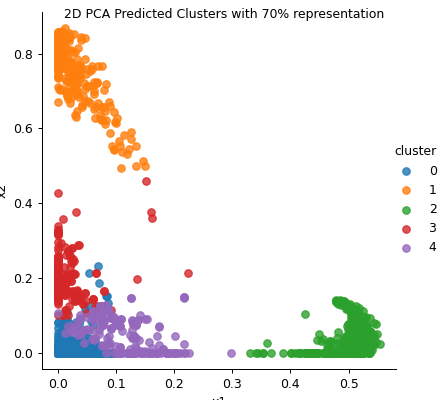

Text(0.5, 0.98, '2D PCA Predicted Clusters with 70% representation')

In [224]:
dfPCA2 = W_df[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=W_df, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters with 70% representation", fontsize=10)

<IPython.core.display.Javascript object>


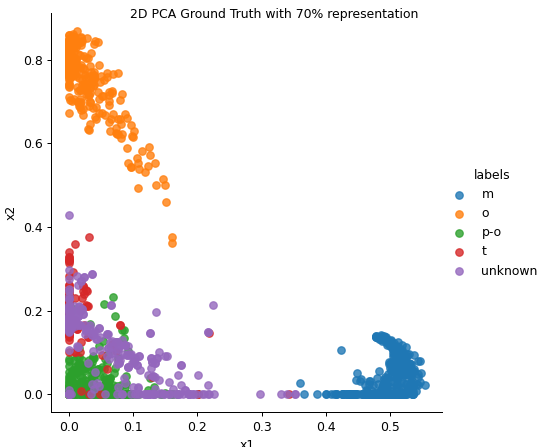

Text(0.5, 0.98, '2D PCA Ground Truth with 70% representation')

In [225]:
lm = sns.lmplot(data=W_df, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth with 70% representation", fontsize=10)

In [226]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [227]:
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()